# NYU Paris - Numerical Analysis

## Interpolation and Approximation

Graphs can be plotted using the [`Plots.jl`](https://github.com/JuliaPlots/Plots.jl) library.

- [GitHub repository](https://github.com/JuliaPlots/Plots.jl)

- [documentation](https://docs.juliaplots.org/stable/)

- [tutorial](https://docs.juliaplots.org/stable/tutorial/)

- It is possible to define default plot options (which can be redefined as needed) by

   ```julia
   Plots.default(fontfamily="Computer Modern",
               titlefontsize=20,
               xlabelfontsize=20,
               ylabelfontsize=20,
               legendfontsize=16,
               xtickfontsize=16,
               ytickfontsize=16,
               linewidth=2,
               markersize=7,
               framestyle=:box,
               label=nothing,
               grid=true)
   ```

In [39]:
# Some useful libraries. You can modify the settings as you like and add libraries if
#  needed (unless it is explicitly mentioned in an exercise not to use external libraries).

using Polynomials, LinearAlgebra, Plots, LaTeXStrings

Plots.default(fontfamily="Computer Modern",
              titlefontsize=20,
              xlabelfontsize=20,
              ylabelfontsize=20,
              legendfontsize=12,
              xtickfontsize=12,
              ytickfontsize=12,
              framestyle=:box,
              label=nothing,
              grid=true)

# For information on any of these, type
# plotattr("framestyle")

### Exercise on Lagrange Interpolation in Inexact Arithmetic

The aim of this exercise is to study the performance of Lagrange interpolation in inexact arithmetic.

1. Create a function `get_lagrange_interpolant` in `Julia` that accepts as arguments a vector `x` of equidistant nodes and a vector `u` of values of a function $u$, which we want to interpolate at these nodes, and returns the Lagrange interpolant $\hat{u}$ as the `interpolant` function in `Julia`. Ensure that inside your function, arithmetic is done in the same precision as the argument it receives. **Hint**: Check the documentation for the `one` and `zero` functions.

2. Test your `get_lagrange_interpolant` function on the function $f:[-1, 1] \to \mathbb{R}$, $f(x) = 1 $ for all $x \in [-1, 1]$ for several values of $n$ and with nodes and values of types `Float64`, `Float32`, and `Float16`.

    Comment on what happens when using more nodes and lower precision types. What can explain this behavior? What is the interpolant with $n$ equidistant nodes of $f$ in exact arithmetic?

3. *Optional:* examine the case of 128-bit precision (type `Float128` available with the [`Quadmath.jl`](https://github.com/JuliaMath/Quadmath.jl) library).

In [40]:
function get_lagrange_interpolant(x, u)
    """
    Define a function which returns a function 'interpolant', which is the Lagrange
    polynomial interpolation through nodes `x` and values `u`
    """

    function interpolant(y)
        """
        Returns u_hat(y), where u_hat is the interpolating polynomial
        """

        return out
    end
    
    return interpolant
end

get_lagrange_interpolant (generic function with 1 method)

In [41]:
# Use the following function to test your implementation

using Plots
function lagrange_tester(n, num_type, fun)
    """
    Test `get_lagrange_interpolant` on the function `fun`
    
    Arguments
    ---------
    n : Number of interpolation nodes
        
    num_type : Floating point format, e.g. Float64
    
    fun: Function to interpolate
        
    Returns
    -------
    
    p1 : plot of the interpolating polynomial at n+1 points and true function
    """
    # Create equidistant nodes
    x = LinRange{num_type}(-1, 1, n)

    # Calculate interpolation
    û = get_lagrange_interpolant(x, fun.(x))

    # Vector of x for plotting
    x_plot = LinRange{num_type}(-1, 1, 400)    

    # Plot interpolant and true function
    p1 = plot(x_plot, û.(x_plot), label = "Interpolating polynomial")
    plot!(x_plot, fun.(x_plot), label = "True function")
    
    # Calculate error
    error = maximum(x -> abs(û(x)-fun(x)), x_plot)
    print("Interpolation error: $error") 
        
    return p1
end

lagrange_tester (generic function with 1 method)

In [42]:
m = 200
fun(x) = sin(x)

fun (generic function with 1 method)

Interpolation error: 1.1192036186713494e-10

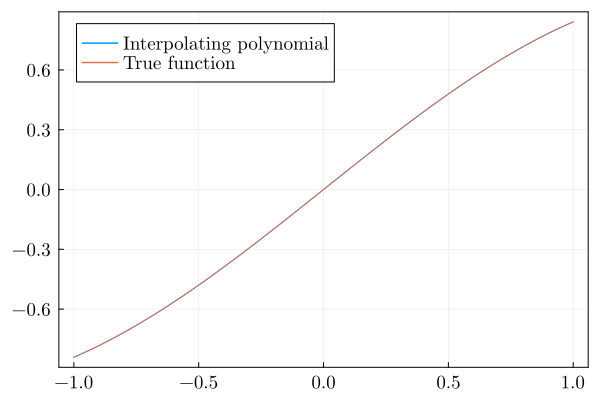

In [43]:
lagrange_tester(31, Float64, fun)

Interpolation error: 6.666006568956107e-8

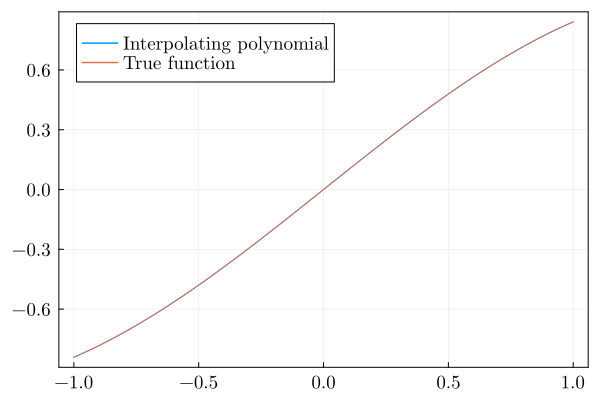

In [44]:
lagrange_tester(41, Float64, fun)

Interpolation error: 5.502048703243112e-5

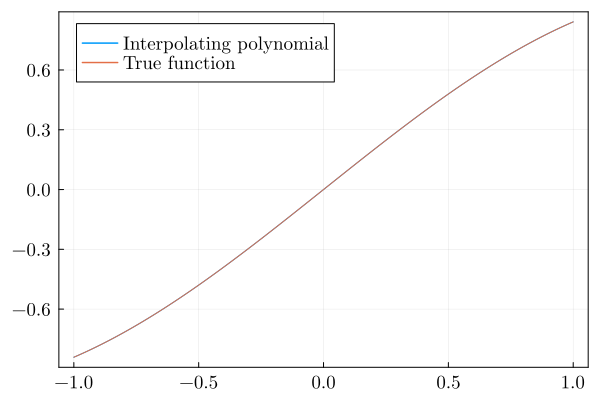

In [45]:
lagrange_tester(51, Float64, fun)

Interpolation error: 0.04266393007697311

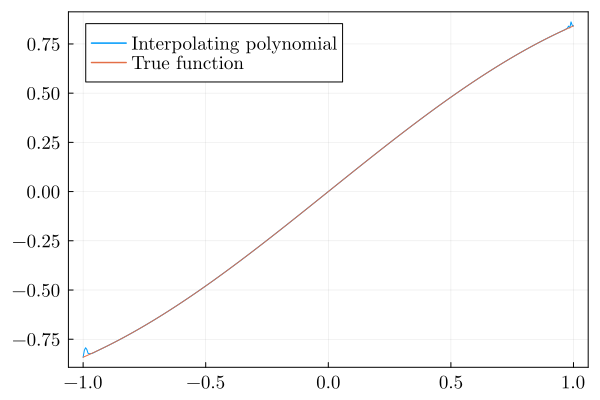

In [46]:
lagrange_tester(61, Float64, fun)

Interpolation error: 7.1525574e-7

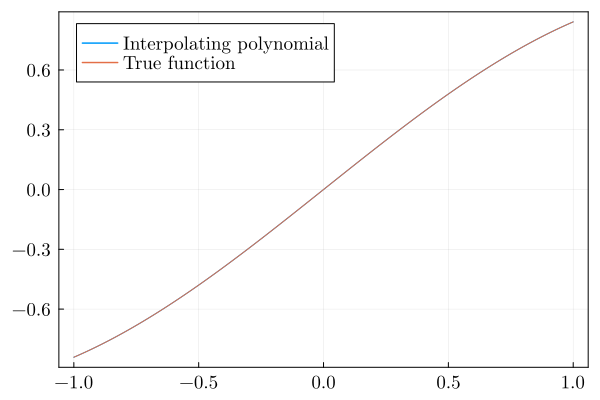

In [47]:
lagrange_tester(11, Float32, fun)

Interpolation error: 0.000121593475

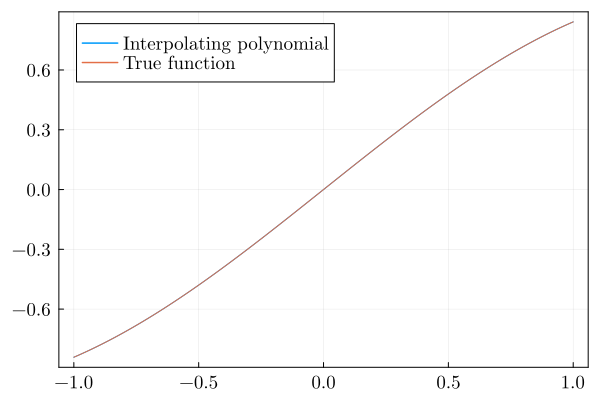

In [48]:
lagrange_tester(21, Float32, fun)

Interpolation error: 0.00586

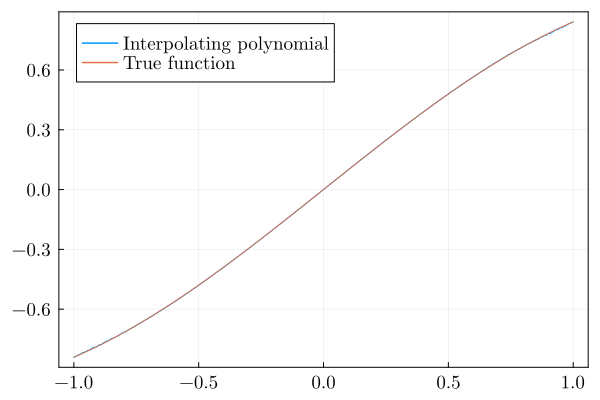

In [49]:
lagrange_tester(11, Float16, fun)

Interpolation error: 80.7

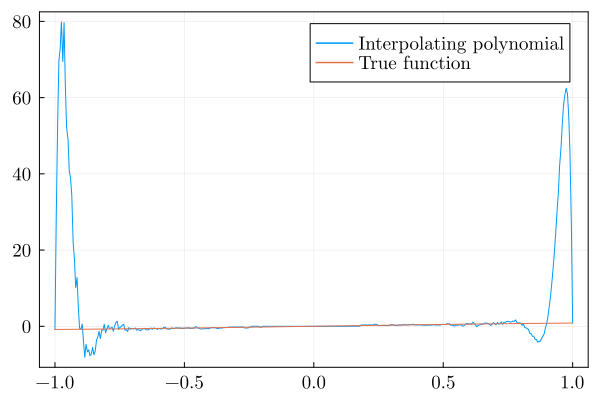

In [50]:
lagrange_tester(21, Float16, fun)

Interpolation error: 1.0041771822792498e10

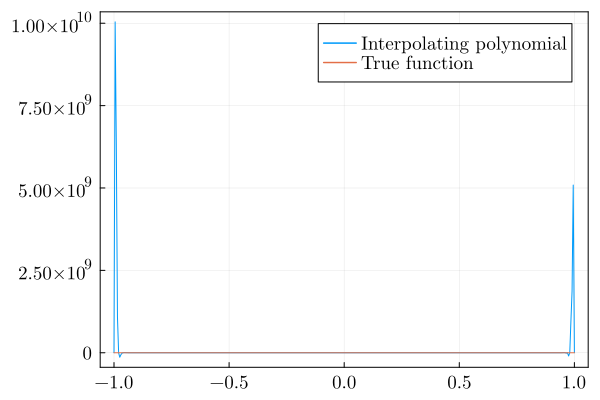

In [51]:
lagrange_tester(101, Float64, fun)

In [52]:
using Quadmath
lagrange_tester(101, Float128, fun)

ArgumentError: ArgumentError: Package Quadmath not found in current path.
- Run `import Pkg; Pkg.add("Quadmath")` to install the Quadmath package.

In [53]:
lagrange_tester(121, Float128, fun)

UndefVarError: UndefVarError: `Float128` not defined

In [54]:
lagrange_tester(131, Float128, fun)

UndefVarError: UndefVarError: `Float128` not defined

In [55]:
lagrange_tester(141, Float128, fun)

UndefVarError: UndefVarError: `Float128` not defined

### Interpolation Nodes Exercise

Write a `Julia` code to interpolate the following function using a 20th-degree polynomial over the interval $[-1, 1]$.
$$
    f(x) = \tanh\left(\frac{x+1/2}{\varepsilon}\right) + \tanh\left(\frac{x}{\varepsilon}\right) + \tanh\left(\frac{x-1/2}{\varepsilon}\right),
    \qquad \varepsilon = .01
$$
Use equidistant nodes and then Chebyshev nodes, and compare the two approaches in terms of precision.
Plot the function $f$ along with the interpolating polynomials.

*Guidelines:*

- To limit numerical rounding errors, it is preferable for the function to return a `BigFloat` type, as follows:

    ```julia
    f(x) = BigFloat(tanh((x+1/2)/ε) + tanh(x/ε) + tanh((x-1/2)/ε))
    ```

- To quickly calculate Chebyshev nodes, you can use the `@.` macro (as always, it is advisable to refer to the documentation of a command by typing `?` and then the command in the console). This command avoids using `.` after each function or before each operator.

    ```julia
    x = @. -cos(π*((0:n-1)+1/2)/n)
    ```

- The calculation of the interpolating polynomial can be obtained using the [`fit`](https://juliamath.github.io/Polynomials.jl/stable/#Fitting-arbitrary-data) function from the [`Polynomials.jl`](https://github.com/JuliaMath/Polynomials.jl) library.

- To compare the two interpolations, it can be useful to limit the minimum and maximum values on the `y` axis using the `ylims = (ymin, ymax)` option in a plotting function like `plot`, `scatter`, or their equivalents ending with `!`. Please note that, by convention in `Julia` (not an obligation), a function whose name ends with `!` modifies its arguments. In the case of a graph, the first command initializing the graph should not have `!` (`plot`, `scatter`, ...), while subsequent commands incrementing the same graph should end with `!` (`plot!`, `scatter!`, ...). Any omission of `!` is considered a *reset* of the plot.



### Exercise on Interpolation Nodes: Graph Animation

Using the [`@animate`](https://docs.juliaplots.org/latest/animations/) macro from the `Plots.jl` library, create an animation to visualize the superimposed evolution of interpolations with equidistant nodes and Chebyshev nodes for the Runge function $u(x)=\frac{1}{1+25x^2}$ over the interval $[-1,1]$. You can vary the number of nodes, for example, from 2 to 50, and take into account the hints from the previous exercise to limit the vertical extension, for example.

### 1. Exercise on Laplace's Equation

We aim to implement a numerical method to approximately solve Laplace's equation with homogeneous Dirichlet boundary conditions:

$$ u\in C^2([0,1]),\quad\left\{\begin{aligned}  -u''(x) & = \varphi(x) & \forall\, x\in(0,1),\\ u(0) & = u(1) = 0. \end{aligned}\right.$$

To do this, we approximate $\varphi$ with an interpolating polynomial $\widehat \varphi$,
and then we exactly solve Laplace's equation with the right-hand side $\widehat \varphi$ instead of $\varphi$. Write a function `approx(n)` implementing this approach.
   The function should return a polynomial approximation of the solution based on an interpolation of **degree** $n$ of the right-hand side at equidistant points between 0 and 1, inclusive.
   We will take the right-hand side to be the function
   $$\varphi(x) = \exp\Bigl(\sin(2\pi x)\Bigr) \Bigl(\sin(2\pi x)-\cos(2\pi x)^2 \Bigr),$$
   in which case the analytical solution is given by
   $$ u(x)=(2\pi)^{-2}\Bigl(\exp\bigl(\sin(2\pi x)\bigr)-1\Bigr).$$

*Hints:*
- You can use the `fit` function from the `Polynomials.jl` library to obtain the interpolating polynomial:

    ```julia
    p = fit(x, y)
    ```

    where `x` are the interpolation nodes, and `y` are the values of the function to interpolate.
    
- To calculate the analytical solution with a polynomial right-hand side, you can notice that all solutions are polynomials, and without boundary conditions, the solution is unique modulo $\mathbf{P}_1$.
    
- You can use the `integrate` function from the `Polynomials.jl` library, which calculates an antiderivative of a polynomial:

    ```julia
    P = integrate(p)
    ```

- Use the `BigFloat` format to limit rounding errors.